#### CNN Regression modeling used based on reference link below :
https://www.kaggle.com/gcdatkin/age-prediction-from-images-cnn-regression

#### deep_learn4.ipynb - was run for 10 year Apple prices weekly images created. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import os
import os.path
import PIL
from PIL import Image
import PIL.Image
import tensorflow as tf
#import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import datetime
from helper1 import add_binary_prediction

In [3]:
print(tf.__version__)

2.5.0


#### Dataset - directory
candlesticks_together

##### Define path for dataset

In [4]:
import pathlib
image_dir = pathlib.Path('candlesticks10yrs/')
#data_test_dir = pathlib.Path('candlesticks_test')

### Create File DataFrame

In [5]:
filepaths = pd.Series(list(image_dir.glob(r'**/*.png')), name='Filepath').astype(str)

In [6]:
filepaths

0      candlesticks10yrs\2011-07-10.png
1      candlesticks10yrs\2011-07-17.png
2      candlesticks10yrs\2011-07-24.png
3      candlesticks10yrs\2011-07-31.png
4      candlesticks10yrs\2011-08-07.png
5      candlesticks10yrs\2011-08-14.png
6      candlesticks10yrs\2011-08-21.png
7      candlesticks10yrs\2011-08-28.png
8      candlesticks10yrs\2011-09-04.png
9      candlesticks10yrs\2011-09-11.png
10     candlesticks10yrs\2011-09-18.png
11     candlesticks10yrs\2011-09-25.png
12     candlesticks10yrs\2011-10-02.png
13     candlesticks10yrs\2011-10-09.png
14     candlesticks10yrs\2011-10-16.png
15     candlesticks10yrs\2011-10-23.png
16     candlesticks10yrs\2011-10-30.png
17     candlesticks10yrs\2011-11-06.png
18     candlesticks10yrs\2011-11-13.png
19     candlesticks10yrs\2011-11-20.png
20     candlesticks10yrs\2011-11-27.png
21     candlesticks10yrs\2011-12-04.png
22     candlesticks10yrs\2011-12-11.png
23     candlesticks10yrs\2011-12-18.png
24     candlesticks10yrs\2011-12-25.png


In [7]:
signal_df = pd.read_csv('signal10yrs.csv')  

In [8]:
signal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 2 columns):
Date      521 non-null object
Signal    521 non-null int64
dtypes: int64(1), object(1)
memory usage: 8.2+ KB


In [9]:
signal_df['Date']= pd.to_datetime(signal_df['Date'])

In [10]:
signal_df.set_index('Date', inplace = True)

In [11]:
signal_df.head()

,Signal
Date,
2011-07-10,0
2011-07-17,1
2011-07-24,1
2011-07-31,1
2011-08-07,0


In [12]:
signal_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 521 entries, 2011-07-10 to 2021-07-04
Data columns (total 1 columns):
Signal    521 non-null int64
dtypes: int64(1)
memory usage: 8.1 KB


In [16]:
filepaths

0      candlesticks10yrs\2011-07-10.png
1      candlesticks10yrs\2011-07-17.png
2      candlesticks10yrs\2011-07-24.png
3      candlesticks10yrs\2011-07-31.png
4      candlesticks10yrs\2011-08-07.png
5      candlesticks10yrs\2011-08-14.png
6      candlesticks10yrs\2011-08-21.png
7      candlesticks10yrs\2011-08-28.png
8      candlesticks10yrs\2011-09-04.png
9      candlesticks10yrs\2011-09-11.png
10     candlesticks10yrs\2011-09-18.png
11     candlesticks10yrs\2011-09-25.png
12     candlesticks10yrs\2011-10-02.png
13     candlesticks10yrs\2011-10-09.png
14     candlesticks10yrs\2011-10-16.png
15     candlesticks10yrs\2011-10-23.png
16     candlesticks10yrs\2011-10-30.png
17     candlesticks10yrs\2011-11-06.png
18     candlesticks10yrs\2011-11-13.png
19     candlesticks10yrs\2011-11-20.png
20     candlesticks10yrs\2011-11-27.png
21     candlesticks10yrs\2011-12-04.png
22     candlesticks10yrs\2011-12-11.png
23     candlesticks10yrs\2011-12-18.png
24     candlesticks10yrs\2011-12-25.png


In [14]:
date_list = []
for i in filepaths:
    #print(i)
    dtstr = os.path.split(i)[1].split(".")[0]
    #print(dtstr)
    #print(datetime.datetime.strptime(dtstr, '%Y-%m-%d').date())
    date_list.append(datetime.datetime.strptime(dtstr, '%Y-%m-%d').date())
    

In [15]:
len(date_list)

521

In [16]:
images_df = pd.DataFrame()
images_df['Date'] = date_list 
images_df['Filepath'] =  filepaths

In [17]:
images_df['Date']= pd.to_datetime(images_df['Date'])

In [18]:
images_df.head()

,Date,Filepath
0,2011-07-10,candlesticks10yrs\2011-07-10.png
1,2011-07-17,candlesticks10yrs\2011-07-17.png
2,2011-07-24,candlesticks10yrs\2011-07-24.png
3,2011-07-31,candlesticks10yrs\2011-07-31.png
4,2011-08-07,candlesticks10yrs\2011-08-07.png


In [19]:
images_df.set_index('Date', inplace=True)

In [20]:
images_df.head()

,Filepath
Date,
2011-07-10,candlesticks10yrs\2011-07-10.png
2011-07-17,candlesticks10yrs\2011-07-17.png
2011-07-24,candlesticks10yrs\2011-07-24.png
2011-07-31,candlesticks10yrs\2011-07-31.png
2011-08-07,candlesticks10yrs\2011-08-07.png


In [21]:
images_df.index

DatetimeIndex(['2011-07-10', '2011-07-17', '2011-07-24', '2011-07-31',
               '2011-08-07', '2011-08-14', '2011-08-21', '2011-08-28',
               '2011-09-04', '2011-09-11',
               ...
               '2021-05-02', '2021-05-09', '2021-05-16', '2021-05-23',
               '2021-05-30', '2021-06-06', '2021-06-13', '2021-06-20',
               '2021-06-27', '2021-07-04'],
              dtype='datetime64[ns]', name='Date', length=521, freq=None)

In [22]:
images = pd.concat([images_df,signal_df], join='inner', axis=1)

In [23]:
images.head(10)

,Filepath,Signal
Date,,
2011-07-10,candlesticks10yrs\2011-07-10.png,0
2011-07-17,candlesticks10yrs\2011-07-17.png,1
2011-07-24,candlesticks10yrs\2011-07-24.png,1
2011-07-31,candlesticks10yrs\2011-07-31.png,1
2011-08-07,candlesticks10yrs\2011-08-07.png,0
2011-08-14,candlesticks10yrs\2011-08-14.png,1
2011-08-21,candlesticks10yrs\2011-08-21.png,1
2011-08-28,candlesticks10yrs\2011-08-28.png,1
2011-09-04,candlesticks10yrs\2011-09-04.png,1


In [24]:
# Let's only use 40 images to speed up training time
image_df = images.sample(421, random_state=1).reset_index(drop=True)
train_df, test_df = train_test_split(image_df, train_size=0.7, shuffle=True, random_state=1)

In [25]:
train_df.head()

,Filepath,Signal
385,candlesticks10yrs\2011-09-18.png,1
186,candlesticks10yrs\2012-11-11.png,0
27,candlesticks10yrs\2020-04-26.png,1
89,candlesticks10yrs\2014-09-07.png,0
327,candlesticks10yrs\2017-10-08.png,1


In [26]:
test_df.head()

,Filepath,Signal
378,candlesticks10yrs\2014-05-18.png,1
165,candlesticks10yrs\2015-09-20.png,1
17,candlesticks10yrs\2017-10-15.png,1
179,candlesticks10yrs\2012-01-15.png,1
4,candlesticks10yrs\2014-11-09.png,0


### Loading Images

In [27]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [28]:
train_df

,Filepath,Signal
385,candlesticks10yrs\2011-09-18.png,1
186,candlesticks10yrs\2012-11-11.png,0
27,candlesticks10yrs\2020-04-26.png,1
89,candlesticks10yrs\2014-09-07.png,0
327,candlesticks10yrs\2017-10-08.png,1
73,candlesticks10yrs\2012-04-15.png,0
69,candlesticks10yrs\2012-10-14.png,1
405,candlesticks10yrs\2020-05-17.png,1
91,candlesticks10yrs\2016-01-24.png,0
192,candlesticks10yrs\2013-12-08.png,1


In [29]:
train_df['Signal'].value_counts()

1    184
0    110
Name: Signal, dtype: int64

In [100]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Signal',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='raw',
    #batch_size=32,
    batch_size=1,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Signal',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='raw',
    #batch_size=32,
    batch_size=1,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Signal',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='raw',
    #batch_size=32,
    batch_size=1,
    shuffle=False
)

Found 236 validated image filenames.
Found 58 validated image filenames.
Found 127 validated image filenames.


### Training

In [101]:
inputs = tf.keras.Input(shape=(120, 120, 3))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
print('after 1st conv2d - ',x)
x = tf.keras.layers.MaxPool2D()(x)
print('after 1st maxpool2d - ',x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
print('after 2nd conv2d - ',x)
x = tf.keras.layers.MaxPool2D()(x)
print('after 2nd maxpool2d - ',x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
print('after 1st GlobalAvgPooling2D - ',x)
features_x = x
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=15,
            restore_best_weights=True
        )
    ]
)

after 1st conv2d -  KerasTensor(type_spec=TensorSpec(shape=(None, 118, 118, 16), dtype=tf.float32, name=None), name='conv2d_4/Relu:0', description="created by layer 'conv2d_4'")
after 1st maxpool2d -  KerasTensor(type_spec=TensorSpec(shape=(None, 59, 59, 16), dtype=tf.float32, name=None), name='max_pooling2d_4/MaxPool:0', description="created by layer 'max_pooling2d_4'")
after 2nd conv2d -  KerasTensor(type_spec=TensorSpec(shape=(None, 57, 57, 32), dtype=tf.float32, name=None), name='conv2d_5/Relu:0', description="created by layer 'conv2d_5'")
after 2nd maxpool2d -  KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 32), dtype=tf.float32, name=None), name='max_pooling2d_5/MaxPool:0', description="created by layer 'max_pooling2d_5'")
after 1st GlobalAvgPooling2D -  KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='global_average_pooling2d_2/Mean:0', description="created by layer 'global_average_pooling2d_2'")
Epoch 1/100
236/236 [=================

In [102]:
print(features_x)

KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='global_average_pooling2d_2/Mean:0', description="created by layer 'global_average_pooling2d_2'")


### Results

In [103]:
predicted_signals = np.squeeze(model.predict(test_images))
true_signals = test_images.labels

rmse = np.sqrt(model.evaluate(test_images, verbose=0))
# print(type(rmse))
# print(len(rmse))
# print(rmse)
print("     Test RMSE1: {:.5f}".format(rmse[0]))
print("     Test RMSE2: {:.5f}".format(rmse[1]))
r2 = r2_score(true_signals, predicted_signals)
print("Test R^2 Score: {:.5f}".format(r2))

     Test RMSE1: 0.83209
     Test RMSE2: 0.74770
Test R^2 Score: -0.01210


In [104]:
null_rmse = np.sqrt(np.sum((true_signals - np.mean(true_signals))**2) / len(true_signals))
print("Null/Baseline Model Test RMSE: {:.5f}".format(null_rmse))

Null/Baseline Model Test RMSE: 0.49650


## We can see that our model is not even better than the null/baseline model (predict mean every time)!

In [105]:
true_signals.shape

(127,)

In [106]:
true_signals

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

In [107]:
predicted_signals.shape

(127,)

In [108]:
predicted_signals

array([0.6270046 , 0.6101452 , 0.58709294, 0.6173741 , 0.6038813 ,
       0.591664  , 0.63650274, 0.6260039 , 0.5874803 , 0.6052136 ,
       0.6114092 , 0.60972846, 0.6191611 , 0.60534656, 0.62918407,
       0.5901759 , 0.6124927 , 0.5910676 , 0.6058425 , 0.6093399 ,
       0.59365386, 0.5900183 , 0.58513576, 0.6143593 , 0.5992663 ,
       0.60630345, 0.614594  , 0.58998185, 0.5863293 , 0.5947421 ,
       0.611649  , 0.5758946 , 0.6083058 , 0.591055  , 0.59895   ,
       0.6025077 , 0.63485974, 0.59733933, 0.59001327, 0.5911715 ,
       0.58221567, 0.6155167 , 0.6248568 , 0.6082096 , 0.60684353,
       0.6115087 , 0.6027596 , 0.60844296, 0.6164441 , 0.6038755 ,
       0.6011506 , 0.6276491 , 0.5881107 , 0.5824686 , 0.6563999 ,
       0.6031465 , 0.60805297, 0.62301433, 0.6271578 , 0.5956992 ,
       0.61362976, 0.6071887 , 0.60098255, 0.60782903, 0.5827498 ,
       0.6262828 , 0.6232636 , 0.6084906 , 0.6322389 , 0.58540386,
       0.60668534, 0.6365488 , 0.62953573, 0.6199186 , 0.58076

In [109]:
len(true_signals)

127

In [110]:
len(predicted_signals)

127

In [111]:
final_predictions_df = pd.DataFrame()
final_predictions_df['Actual'] = true_signals
final_predictions_df['Predicted'] =  predicted_signals

In [112]:
final_predictions_df

,Actual,Predicted
0,1,0.627005
1,1,0.610145
2,1,0.587093
3,1,0.617374
4,0,0.603881
5,1,0.591664
6,1,0.636503
7,0,0.626004
8,1,0.587480
9,1,0.605214


In [113]:
final_predictions_df = add_binary_prediction(final_predictions_df)

In [114]:
final_predictions_df

,Actual,Predicted,binary_prediction
0,1,0.627005,1
1,1,0.610145,1
2,1,0.587093,1
3,1,0.617374,1
4,0,0.603881,1
5,1,0.591664,1
6,1,0.636503,1
7,0,0.626004,1
8,1,0.587480,1
9,1,0.605214,1


In [115]:
binary_signal = []
for index, row in final_predictions_df.iterrows():
    #print(row[1])
    if row[1] > 0.5:
        binary_signal.append(1)
    else:
        binary_signal.append(0)

In [116]:
final_predictions_df['binary_prediction'] = binary_signal

In [117]:
final_predictions_df.head()

,Actual,Predicted,binary_prediction
0,1,0.627005,1
1,1,0.610145,1
2,1,0.587093,1
3,1,0.617374,1
4,0,0.603881,1


In [118]:
final_predictions_df['Actual'].value_counts()

1    71
0    56
Name: Actual, dtype: int64

In [119]:
final_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 3 columns):
Actual               127 non-null int64
Predicted            127 non-null float32
binary_prediction    127 non-null int64
dtypes: float32(1), int64(2)
memory usage: 2.6 KB


In [120]:
# def add_binary_prediction(df1):
#     binary_signal = []
#     for index, row in df1.iterrows():
#     #print(row[1])
#         if row[1] > 0.5:
#             binary_signal.append('1')
#         else:
#             binary_signal.append('0')
#     df1['binary_prediction'] = binary_signal
#     return df1

<AxesSubplot:>

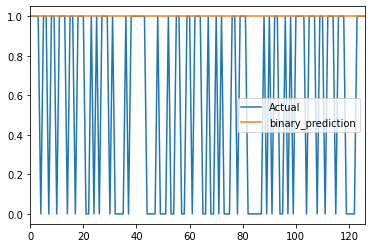

In [121]:
final_predictions_binary_df = final_predictions_df.drop(columns=['Predicted'])
final_predictions_binary_df.plot()

<AxesSubplot:>

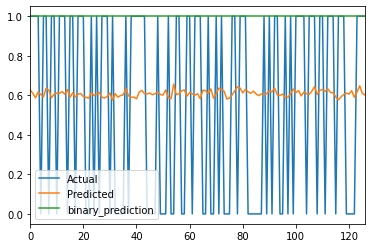

In [122]:
final_predictions_df.plot()